In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
labels, data = iris.target, iris.data

# label_names = np.array([iris.target_names[l] for l in labels])

target_names = iris.target_names

iris_df = pd.DataFrame(data, columns = iris.feature_names)

In [237]:
iris_df['label'] = labels

iris_df['label_name'] = np.array([iris.target_names[l] for l in labels])
iris_df = iris_df.sample(frac=1) # Randomizes our data since it was in order
iris_df.head() # Displays the first 5 rows of the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_name
42,4.4,3.2,1.3,0.2,0,setosa
81,5.5,2.4,3.7,1.0,1,versicolor
12,4.8,3.0,1.4,0.1,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
102,7.1,3.0,5.9,2.1,2,virginica


Text(6.9, 3.9000000000000004, '')

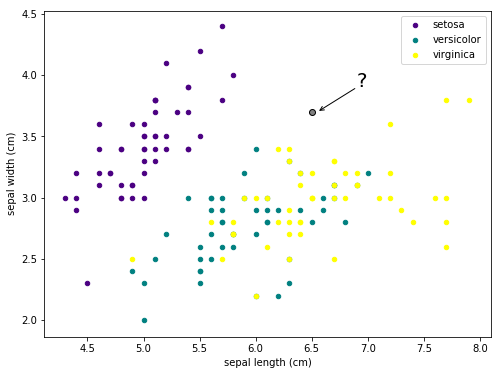

In [238]:
colors = ['indigo', 'teal', 'yellow']

fig, ax = plt.subplots(1, 1, figsize=(8,6))

for key, row in iris_df.groupby('label'):
    row.plot.scatter(ax=ax, x='sepal length (cm)', y='sepal width (cm)', label=target_names[key], color=colors[key]);
    
    
new_x, new_y = 6.5, 3.7
plt.scatter(new_x, new_y, c='grey', cmap=None, edgecolor='k')
plt.annotate('?', (new_x+0.45, new_y+0.25), fontsize=20, horizontalalignment='center', verticalalignment='center')
plt.annotate("", xytext=(new_x+0.4, new_y+0.2), xy=(new_x+0.05, new_y), arrowprops=dict(arrowstyle="->"))

In [239]:
# We take the sum of the squares of all the values in dataset 
# in order to determine the distance from the new point.
# iris_df.iloc[:, :2].values grabs the first two columns of
# our pandas dataframe as a numpy array

distances = np.sum((iris_df.iloc[:, :2].values - [new_x, new_y])**2, axis=1)

In [240]:
closest_point = np.argmin(distances)


In [241]:
closest_point

54

In [242]:
iris_df.iloc[closest_point]

sepal length (cm)          6.3
sepal width (cm)           3.4
petal length (cm)          5.6
petal width (cm)           2.4
label                        2
label_name           virginica
Name: 136, dtype: object

In [243]:
X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, 4].values

In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [245]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [246]:
y_pred = classifier.predict(X_test)


In [247]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6  0  0]
 [ 0 12  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [248]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

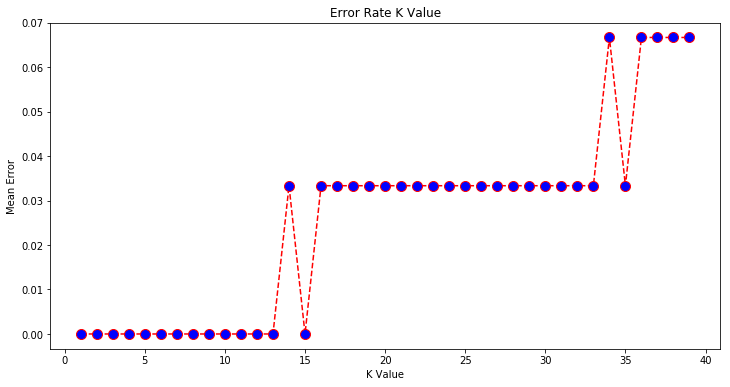

In [249]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')